# Customer Segmentation Using K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import sklearn
from datetime import datetime, timedelta


### Motivations: 
Customer segmentation is the fundamental basis of recommendations to improve customer satisfaction and retention. Clustering customers help to identify users with similar behaviors, patterns or beliefs which helps companies provide accurate personalized services for the differnt kinds of customers. Clustering not only aids in providing a seamless experience for the users, but it also helps companies identify opportunities for growth and investment, as well as to distrubute resources according to each identified group.

For this project we are going to use K-Means clustering, with marketing data from [kaggle](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign) to create customer segmentation clusters. 

### Types of Clustering:
Clustering can be done in different ways, depending on business intentions and motivations. 

* **Geographic segmentation:** Clustering customers based on location. Can be used for projects such as identifying traffic patterns or identifying highest grossing products based on location.

* **Demographic segmentation:** Clustering individuals by personal similarities and motivations. For example, you clustering individuals who regularly purchase diapers as parents vs those who do not as non-parents. Other examples include identifying the age and gender of the most loyal costumers, which can then help focus initiatives on retaining those customers. 

* **Psychographic segmentation:** Clustering individuals based on interests, beliefs and values. This can mean grouping individuals with similar taste in music, running patters or clothing brands.

* **Behavioral segmentation:** Clustering individuals based on their habits or actions such as app-usage or store-visit patterns. Can be used to identify involvement and sense of loyalty.

* **Needs-based segmentation:** Clustering individuals based on needs. For example, grouping customers that require home delivery options as a must-have.

* **Value-based segmentation:** Clustering customers based on their spending patterns, revenue and loyalty spending for the company. 

* **Technographic segmentation:** Clustering individuals by the way they use and access technology to reach services, or buy products. For example, identifying those that use desktop, mobile or external applications to complete transactions or access services. 



### Data:
Below we explore the different columns in the data and also group them into the different cluster-types we can formulate from the columns. 

#### Demographic segmentation: 
ID: Unique identifyer for each customer in the data <br>
Year_Birth: Year the customer was born <br>
Education: Customer's highest level of education <br>
Maritual Status: Whether customer is married or not  <br>
Income: Yearly income  <br>
Kidhome: Are there kids below 13 in the customer's home <br>
Teenhome: Are there kids above the age of 13 in the home <br>
Dt_customer: Date the customer signed up to purchase from the company <br>
Recency: How long it has been (days) since the customer visited the store <br> above 13 in the home <br>


#### Needs based segmentation / Value based segmentation:
The following columns contain information regarding spenditure in the last two years
MntWines: Amount spent on wine   <br>
MntFruits: Amount spent on food  <br>
MntMeatProducts: Amount spent on meat  <br>
MntFishProducts: Amount spent on fish <br>
MntSweetProducts: Amount spent on sweets <br>
MntGoldProds: Amount spent on gold products <br>

#### Technographic segmentation:
NumWebPurchases: Number of purchases made via company's website  <br>
NumCatalogPurchases: Number purchases made via company's catalog <br>
NumStorePurchases: Number of purchases made in store <br>
NumWebVisitsMonth: Number of times the customer visited the store in the last month<br>

#### Behavioral segmentation:
The following columns identify the customer's acceptance to advertisement campaigns, 1 if yes, 0 if not
AcceptedCmp1: Customers who accepted campaign's first attempt  <br>
AcceptedCmp2: Customers who accepted campaign's second attempt <br>
AcceptedCmp3: Customers who accepted campaign's third attempt<br>
AcceptedCmp4: Customers who accepted campaign's fourth attempt<br>
AcceptedCmp5: Customers who accepted campaign's fifth attempt <br>
Complain: Captures whether the customer complained(1) or not(0) in the past two years<br>


#### Value based segmentation:
Z_CostContact  <br>
Z_Revenue <br>
Response <br>
NumDealsPurchases: Purchases made by the customer using promotion/sale  <br>


In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head(50)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Cleaning:


Before we begin cleaning our columns, let's investigate some columns that we are not sure about: 
* Z_CostContract
* Z_Revenue
* Reponse

In [4]:
print(df['Z_CostContact'].describe())
print(df['Z_CostContact'].unique())
print()

print(df['Z_Revenue'].describe())
print(df['Z_Revenue'].unique())
print()

print(df['Response'].describe())
print(df['Response'].unique())

count    2240.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Z_CostContact, dtype: float64
[3]

count    2240.0
mean       11.0
std         0.0
min        11.0
25%        11.0
50%        11.0
75%        11.0
max        11.0
Name: Z_Revenue, dtype: float64
[11]

count    2240.000000
mean        0.149107
std         0.356274
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64
[1 0]


At this point, we would need to ask a domain expert what these values mean to better gaige their significance. Perhaps they signify something really important that we are overlooking. Let's assume the expert determines that the columns don't seem to be very useful for our project so we will begin by dropping them from our dataset.

In [5]:
df = df.drop(['Z_CostContact', 'Z_Revenue', 'Response'], axis=1)

Let's determine the rows that are missing all values in the dataset:

In [6]:
null_vals = df.loc[df.isnull().any(axis=1)]
null_vals

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,1,0,2,7,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,27,0,0,1,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,1,3,4,2,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,2,1,4,6,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,2,0,3,6,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,3,0,3,8,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,7,2,8,9,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,1,0,2,7,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,2,4,8,1,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,1,7,6,0,0,0,0,0,0


Identifying distribution of numerical values:

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the description above:
* We see that the income column is missing some values. <br>
* We see that the minimum year of birth is 1893 so we will need to confirm that this isn't a misentry. <br>
* We see that the the MntWines, MntFruits, MntMeat and MntFish products and Income columns have some pretty high 75 quantile and max values so we will need to inspect and confirm that. <br>
* It doesn't seem like we have any negative values in our dataset

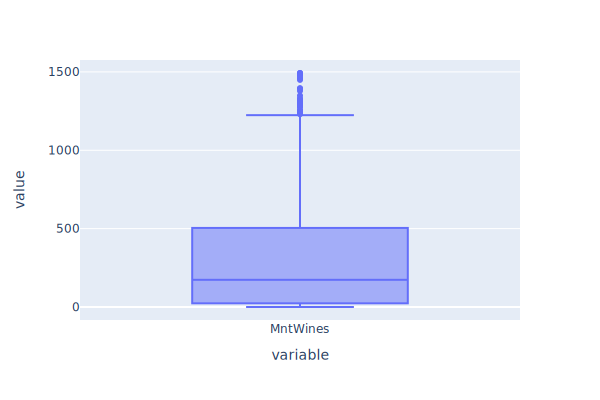

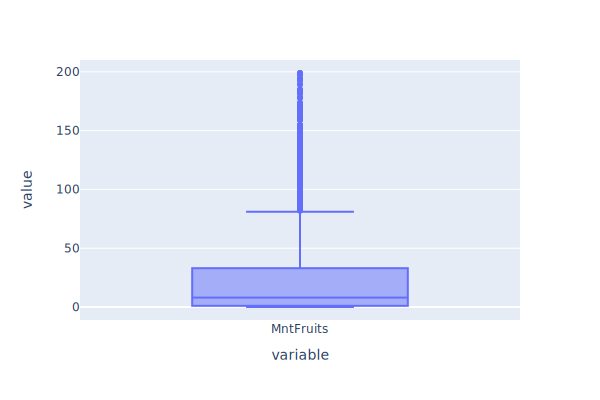

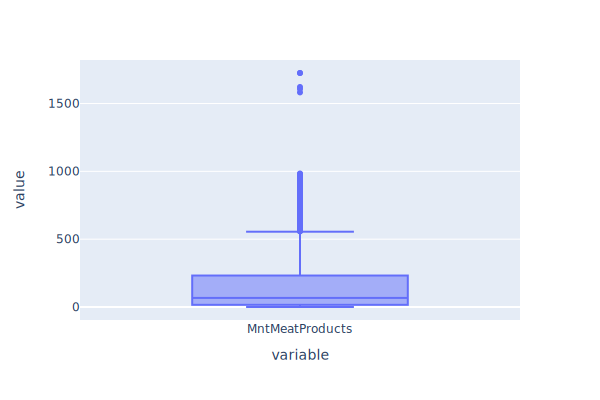

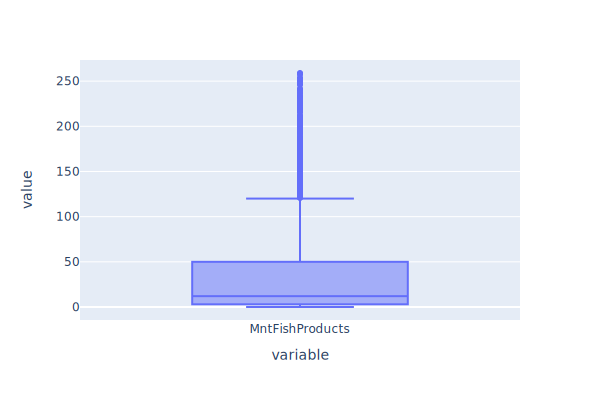

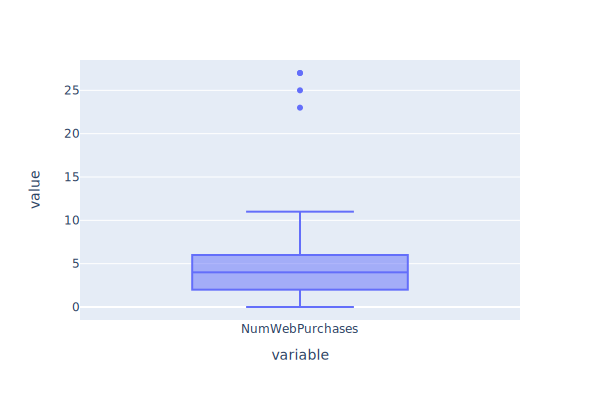

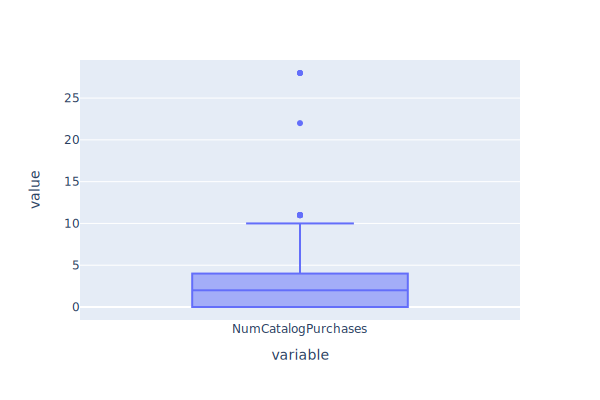

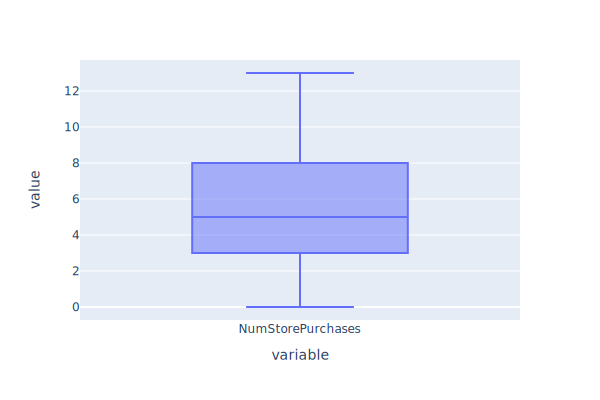

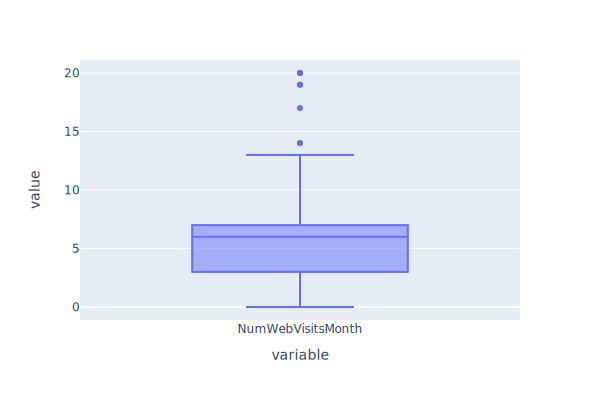

In [8]:
num_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'NumWebPurchases', 'NumCatalogPurchases',
               'NumStorePurchases', 'NumWebVisitsMonth']
for feature in num_features:
    fig = px.box(df[feature],
    width=600, height=400
    )
    fig.show("svg")

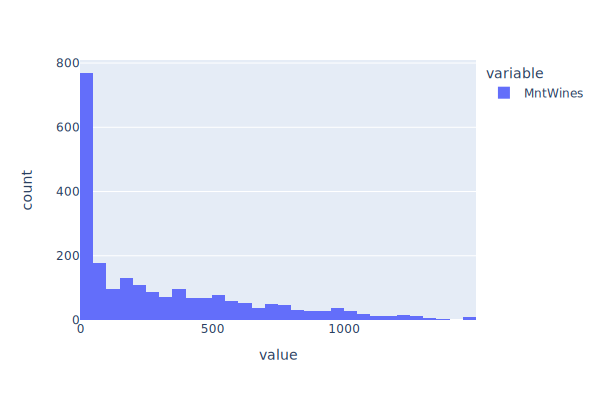

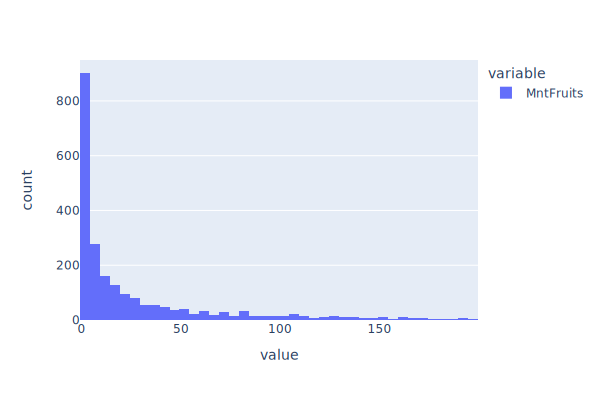

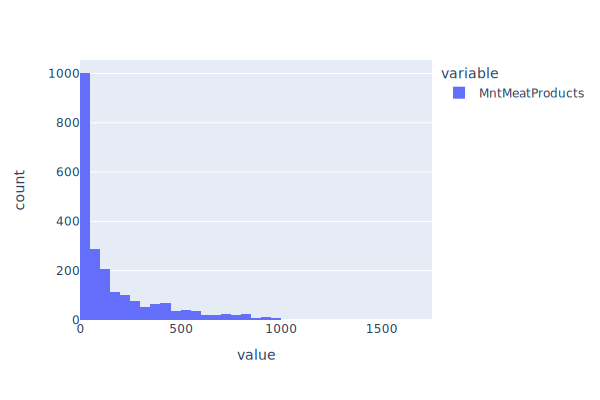

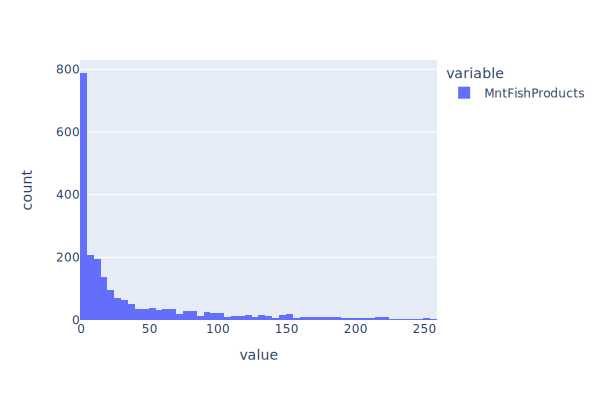

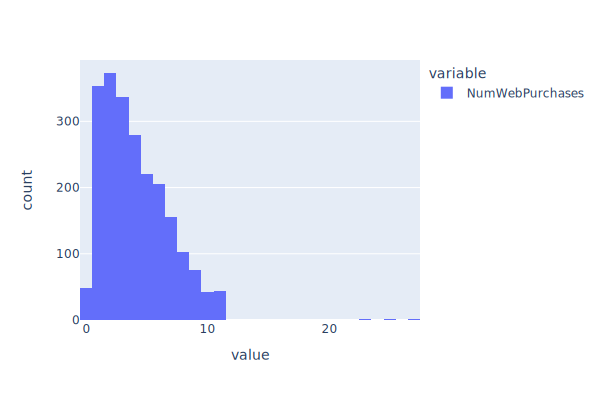

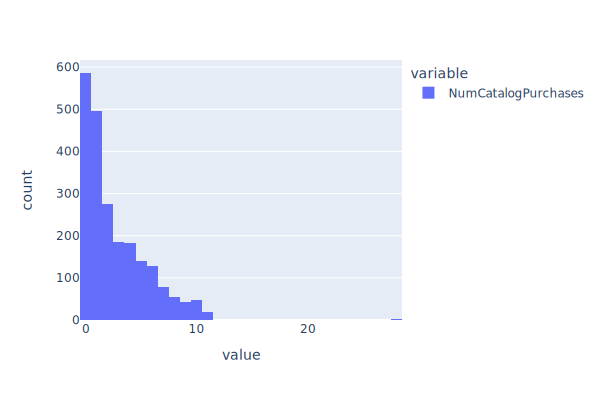

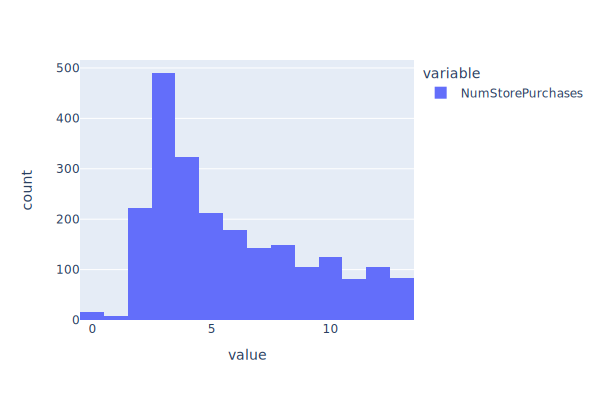

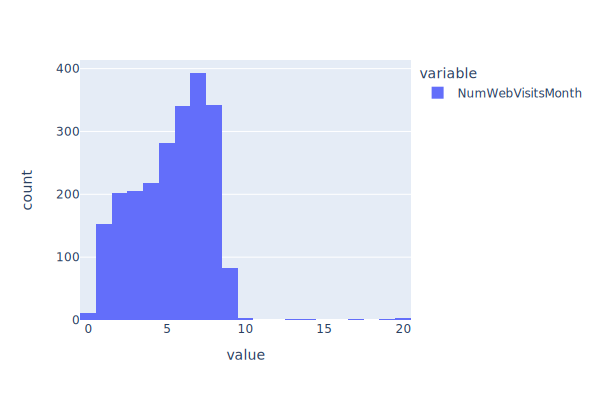

In [9]:
for feature in num_features:
    fig = px.histogram(df[feature],
    width=600, height=400
    )
    fig.show("svg")

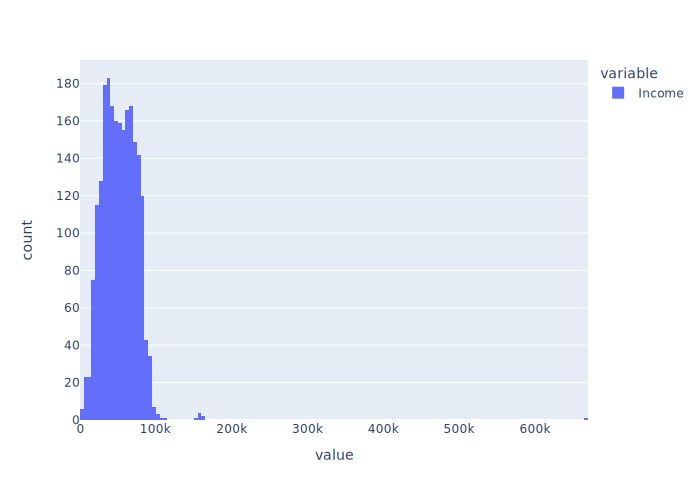

In [10]:
fig = px.histogram(df['Income'])
fig.show("svg")

### Data cleaning steps:
We will be thorough in cleaning our data. After all, you can build fancy, complicated algorithms but if the data is low quality, the outcome could be less than ideal. 

* Make sure each ID row is unique <br>
* Look at the Age columns to make sure that there are not typos or anomaly. For example, it would be impossible for someone born in 1876 to place an online order. We'll find the range of values, and set a minimum threshold value based on that, swapping the 7 in entries with 1789 or 8 in entries with 1896, with a 9 for the 1900s, which seems more realistic.<br>
* Find the empty values in the Education column and replace them with the most common value found in the dataset.<br>
* We'll look at the marital status column to make sure that there aren't any numeric or empty values. In addition, we'll make sure that married or divorced entries have an age of at least 18 years or older in case there are wrong entries on the column, a 13 year old customer with a "married" marital statue is highly likely an error. <br>
* We'll make sure that the income value entries are all numeric, and if they are empty we'll replace them with the median value and update the type to "int64" to match the other features<br>
* Kidhome and Teenhome should be numeric integer and no less than 0. No one can have a 1.5 kid, for example.
* We'll transform the Rencency column into integers to capture exact days by rounding floats to the nearest integers. <br>
* Identify and handle outliers in amount spent on goods. For example, did someone really spend 700 dollars of wine in one day? Maybe, it could have been a wholesale order but we don't want to apply that irregularity to our model since it isn't something that the average person would regularly do <br>
* We'll look for outliers in the product columns <br> 

### ID Column
#### Determining if all ID entries are unique.
Running the cell below, we will see that there doesn't seem to be any duplicates in the ID columns so there is nothing to clean for that column

In [11]:
df['ID'].duplicated().value_counts()

ID
False    2240
Name: count, dtype: int64

### Age Column

In [12]:
df['Year_Birth'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

In [13]:
# df['Age']= df['Year_Birth'].apply(lambda x: datetime.now().year - x )

In [14]:
# df['Age'].max()

In [15]:
def create_age_col(df):
    df['Age']= df['Year_Birth'].apply(lambda x: datetime.now().year - x )
    df['Age'].mask(df['Age'] > 83, 83, inplace=True)
    df = df.drop('Year_Birth', axis=1)
    age_col = df.pop('Age')
    df.insert(1, 'Age', age_col)
    
    
    
    
    


In [28]:
create_age_col(df)
df

KeyError: 'Year_Birth'

In [17]:
print(df['Age'].unique())

[66 69 58 39 42 56 52 38 49 73 40 47 64 71 36 77 43 74 41 44 72 54 37 34
 60 53 50 80 48 27 55 59 46 45 68 57 35 75 65 51 63 78 32 61 70 62 67 31
 83 33 76 30 29 82 79 28]


It looks like our oldest customer is 83, so we will set the cutoff for age to 83. 

Let's find those values:

In [18]:
df['Age'].loc[df['Age'] > 83]

Series([], Name: Age, dtype: int64)

In [19]:
df['Age'].mask(df['Age'] > 83, 83, inplace=True)

In [20]:
df['Age'].describe()

count    2240.000000
mean       54.137054
std        11.741768
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: Age, dtype: float64

Let's drop the 'Year_Birth' column and replace it with our newly created 'Age' column:

In [21]:
age_col = df.pop('Age')
df.insert(1, 'Age', age_col)

In [22]:
df = df.drop('Year_Birth', axis=1)

In [23]:
df

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,5524,66,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,8,10,4,7,0,0,0,0,0,0
1,2174,69,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,1,2,5,0,0,0,0,0,0
2,4141,58,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,8,2,10,4,0,0,0,0,0,0
3,6182,39,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,2,0,4,6,0,0,0,0,0,0
4,5324,42,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,56,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,9,3,4,5,0,0,0,0,0,0
2236,4001,77,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,8,2,5,7,0,0,0,1,0,0
2237,7270,42,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,2,3,13,6,0,1,0,0,0,0
2238,8235,67,Master,Together,69245.0,0,1,24-01-2014,8,428,...,6,5,10,3,0,0,0,0,0,0


Let's plot our new distribution of ages: 

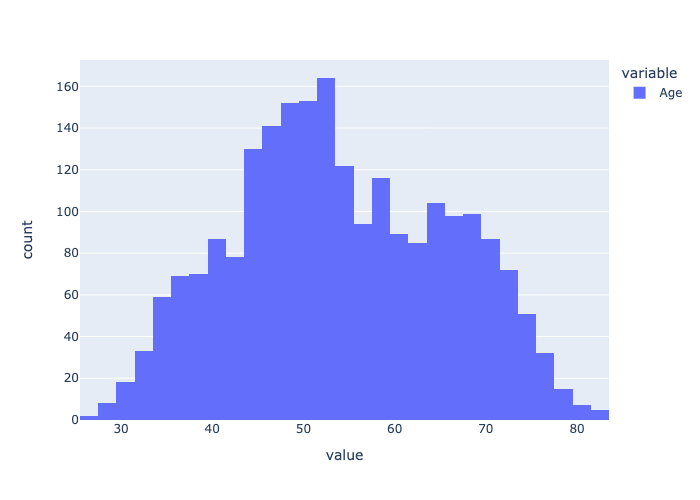

In [24]:
fig = px.histogram(df['Age'])
fig.show('png')

### Martial_Status Column

Let's look at the categorical values:

Below we can see the different entries for 'Marital_Status', and it looks like we need to replace some of those entries assuming that 'Alone', 'Absurd', and 'YOLO' fall under the 'Single' category.

In [25]:
cat_df = df.select_dtypes(exclude=['int','float'])
for col in cat_df:
    print(cat_df[col].unique())
    print()
    print(cat_df[col].value_counts())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '05-11-2013' '02-10-2013' '28-06-2014'
 '09-11-2012' '24-05-2013' '01-01-2014' '08-11

In [26]:
def clean_cat_features(df):
    # cleaning marital status values 
    df['Marital_Status']= df['Marital_Status'].replace(
            {'Together': 'Married',
            'Alone': 'Single',
            'Absurd': 'Single',
            'YOLO': 'Single'})
    
    # creating age feature from birth year column 
    df['Age']= df['Year_Birth'].apply(lambda x: datetime.now().year - x )
    #iter two after determining the oldest age reported was 130
    
    
#     df['Loyalty_Since'] = df['Dt_Customer'].apply(lambda x: datetime.now() - )
    
    
    
    
    
    print(df['Marital_Status'].unique())
    return df

It looks like we successfully cleaned the 'Marital_Status' column by reducing the categories, to confirm run the cell below:

In [27]:
df = clean_cat_features(df)

KeyError: 'Year_Birth'

Let's take a look at our new feature "Age". From the cell below, we can see the youngest and the oldest ages but something seems a little weird if you look at the max value. It appears that at least one of the customers is 130 years old! Good for them but bad for us because we can't accept that as a reality. This means that we need to set a cutoff. If this were a real project, I would consult with the domain expert to determine if they have established a maximum age group that they would like to target, and set the value to that treshhold. However, for the sake of this project, we will replace the age of the rows with abnormally high values with most realistic high value we find.

In [ ]:
df

In [ ]:
df['Marital_Status'].unique()

## Feature engineering:
* **Age:** Using Year_Birth feature to create an age column for each unique customer <br>
* **Loyalty_since:** We'll be using the Dt_customer to determine the time the customer has been a member of the company based from the most recent input in the dataset, and we'll convert it from type "object" to "int64" <br>
* **Total_goods:** We'll be adding all the products to create a general amount of goods spent by the customer <br>
* **Edu_leve_US:** Updating this column to reflect standard US expressions. In the dataset, "Graduation" means that the customer completed a Bachelor's degree, and "2nd Cycle" means Master's degree <br>
